# WB

## Instalacja bibliotek

In [2]:
!pip install h5py

In [19]:
!pip install keras

In [17]:
!python -m pip install --upgrade pip

In [20]:
!pip install grpcio>=1.48.2

In [21]:
!pip install scikit-learn --user

In [22]:
!pip install tensorflow --user

In [15]:
!pip install --upgrade numpy==1.23.0 --user
!pip install --upgrade lightgbm==3.3.0 --user
!pip install --upgrade scikit-learn==1.0.1 --user
!pip install --upgrade jinja2==3.0.3 --user
!pip install --upgrade matplotlib>=3.5.0 --user

  Using cached numpy-1.23.0-cp38-cp38-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
verstack 2.0.6 requires matplotlib, which is not installed.
autowoe 1.3.1 requires matplotlib, which is not installed.
catboost 1.0.5 requires matplotlib, which is not installed.
klib 1.0.7 requires matplotlib<4.0.0,>=3.0.3, which is not installed.
mizani 0.7.4 requires matplotlib>=3.5.0, which is not installed.
mlxtend 0.19.0 requires matplotlib>=3.0.0, which is not installed.
plotnine 0.8.0 requires matplotlib>=3.1.1, which is not installed.
scikit-image 0.17.2 requires matplotlib!=3.0.0,>=2.0.0, which is not installed.
seaborn 0.12.2 requires matplotlib!=3.6.1,>=3.1, which is not installed.
lightautoml 0.3.3 requires lightgbm<3.0,>=2.3, but you have lightgbm 3.3.0 which is incompatible.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lightautoml 0.3.3 requires lightgbm<3.0,>=2.3, but you have lightgbm 3.3.0 which is incompatible.


In [1]:
#rozpakuj zip
import gzip
import shutil

input_file = 'camelyonpatch_level_2_split_test_x.h5.gz'
output_file = 'camelyonpatch_level_2_split_test_x.h5'

with gzip.open(input_file, 'rb') as f_in:
    with open(output_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
        
        
input_file = 'camelyonpatch_level_2_split_test_y.h5.gz'
output_file = 'camelyonpatch_level_2_split_test_y.h5'

with gzip.open(input_file, 'rb') as f_in:
    with open(output_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [25]:
!pip install --upgrade h5py keras numpy tensorflow scikit-learn scipy --user

  Using cached h5py-3.8.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl (14.9 MB)
  Using cached scikit_learn-1.2.2-cp38-cp38-win_amd64.whl (8.3 MB)
  Using cached numpy-1.23.5-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
verstack 2.0.6 requires scikit-learn==1.0.1, but you have scikit-learn 1.2.2 which is incompatible.
lightautoml 0.3.3 requires lightgbm<3.0,>=2.3, but you have lightgbm 3.3.0 which is incompatible.


In [1]:
import h5py

from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import h5py
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import keras
from tensorflow.keras.callbacks import Callback
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score 
from scipy.stats import mode

## Przygotowanie zbioru danych

In [2]:
#funkcja do podziału danych, ratio_1_0 = ile procent 0 w zbiorze
np.random.seed(243)
def split_data(x, y, train_ratio, val_ratio, test_ratio,ratio_1_0=0.85):
    class_0_indices = np.where(y == 0)[0]
    class_1_indices = np.where(y == 1)[0]
    
    total_samples = len(x)
    class_0_size = len(class_0_indices)

    class_1_size = int((class_0_size/ratio_1_0)) - class_0_size
   
    np.random.shuffle(class_0_indices)
    np.random.shuffle(class_1_indices)

    train_size_0 = int(class_0_size * train_ratio)
    val_size_0 = int(class_0_size * val_ratio)
    train_size_1 = int(class_1_size * train_ratio)
    val_size_1 = int(class_1_size * val_ratio)
    test_size_1 = int(class_1_size * test_ratio)
    test_size_0 = int(class_0_size * test_ratio)
    
    x_train = np.concatenate([x[class_0_indices[:train_size_0]], x[class_1_indices[:train_size_1]]])
    y_train = np.concatenate([y[class_0_indices[:train_size_0]], y[class_1_indices[:train_size_1]]])
    x_val = np.concatenate([x[class_0_indices[train_size_0:train_size_0 + val_size_0]], x[class_1_indices[train_size_1:train_size_1 + val_size_1]]])
    y_val = np.concatenate([y[class_0_indices[train_size_0:train_size_0 + val_size_0]], y[class_1_indices[train_size_1:train_size_1 + val_size_1]]])
    x_test = np.concatenate([x[class_0_indices[train_size_0 + val_size_0:train_size_0 + val_size_0+test_size_0]], x[class_1_indices[train_size_1 + val_size_1:test_size_1+train_size_1 + val_size_1]]])
    y_test = np.concatenate([y[class_0_indices[train_size_0 + val_size_0:train_size_0 + val_size_0+test_size_0]], y[class_1_indices[train_size_1 + val_size_1:test_size_1+train_size_1 + val_size_1]]])

    train_indices = np.arange(len(x_train))
    val_indices = np.arange(len(x_val))
    test_indices = np.arange(len(x_test))
    np.random.shuffle(train_indices)
    np.random.shuffle(val_indices)
    np.random.shuffle(test_indices)

    x_train, y_train = x_train[train_indices], y_train[train_indices]
    x_val, y_val = x_val[val_indices], y_val[val_indices]
    x_test, y_test = x_test[test_indices], y_test[test_indices]

    return (x_train, y_train), (x_val, y_val), (x_test, y_test)


with h5py.File('camelyonpatch_level_2_split_test_x.h5', 'r') as f:
    x_data = f['x'][:]

with h5py.File('camelyonpatch_level_2_split_test_y.h5', 'r') as f:
    y_data = f['y'][:]

(x_train, y_train), (x_val,y_val) , (x_test, y_test) = split_data(x_data, y_data, 0.3, 0.1,0.3)

datagen = ImageDataGenerator(
    preprocessing_function=lambda x: x / 255.,
    width_shift_range=4,  
    height_shift_range=4,  
    horizontal_flip=True,  
    vertical_flip=True)  

In [3]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
n_w = len(y_train)
n_1 =y_train.sum()

print("Ilość obserwacji w train:", n_w)
print("Ilość 1 w train:", n_1)
n_w = len(y_val)
n_1 =y_val.sum()
print("Ilość obserwacji w walidacji:", n_w)
print("Ilość 1 w walidacji:", n_1)
n_w = len(y_test)
n_1 =y_test.sum()
print("Ilość obserwacji w test:", n_w)
print("Ilość 1 w test:", n_1)

x_train shape: (9834, 96, 96, 3)
y_train shape: (9834, 1, 1, 1)
x_val shape: (3278, 96, 96, 3)
y_val shape: (3278, 1, 1, 1)
x_test shape: (9834, 96, 96, 3)
y_test shape: (9834, 1, 1, 1)
Ilość obserwacji w train: 9834
Ilość 1 w train: 4917
Ilość obserwacji w walidacji: 3278
Ilość 1 w walidacji: 1639
Ilość obserwacji w test: 9834
Ilość 1 w test: 4917


In [4]:
y_test = np.reshape(y_test, (y_test.shape[0], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_val = np.reshape(y_val, (y_val.shape[0], 1))

## Zmiana barwy zdjęcia

In [6]:
#import albumentations as A
import cv2
#from PIL import Image
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
from skimage import exposure
import random

In [4]:
def transform_color(dataset):
    return color.rgb2gray(dataset)

In [5]:
def transform_color_clahe(dataset):
    return exposure.equalize_adapthist(dataset)

In [36]:
transformed_x_train = transform_color(x_train)
transformed_x_val = transform_color(x_val)
transformed_x_test = transform_color(x_test)
clahe_transformed_x_train = transform_color_clahe(transformed_x_train)
clahe_transformed_x_val = transform_color_clahe(transformed_x_val)
clahe_transformed_x_test = transform_color_clahe(transformed_x_test)

In [48]:
rgb_batch_x_train = np.repeat(clahe_transformed_x_train[..., np.newaxis], 3, -1)
rgb_batch_x_val = np.repeat(clahe_transformed_x_val[..., np.newaxis], 3, -1)
rgb_batch_x_test = np.repeat(clahe_transformed_x_test[..., np.newaxis], 3, -1)

In [45]:
def present_transformation(dataset, transformed_dataset, clahe_transformed_dataset, n=4):
    fig, axs = plt.subplots(3, n)
    
    for i in range(n):
        idx = random.randint(0, len(dataset))
        
        axs[0, i].imshow(dataset[idx])
        axs[0, i].axis('off')
        
        axs[1, i].imshow(transformed_dataset[idx], cmap="gray")
        axs[1, i].axis('off')
        
        axs[2, i].imshow(clahe_transformed_dataset[idx], cmap="gray")
        axs[2, i].axis('off')        
        
        axs[0, i].set_title(f'Patch {idx}', fontsize=10)
    
    plt.tight_layout()
    plt.show()

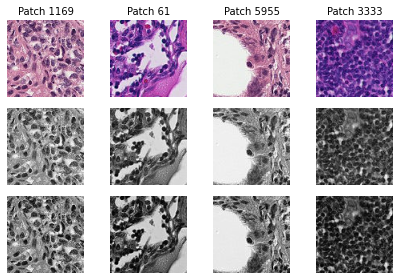

In [46]:
present_transformation(x_train, transformed_x_train, clahe_transformed_x_train, n=4)

# Modelowanie bez koloru

## Trening modelu

In [24]:
from tensorflow.keras.callbacks import Callback

class MetricsCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_preds = self.model.predict(x_val)
        val_preds = val_preds.astype(int)
        #val_preds = np.argmax(val_preds, axis=1)

        val_accuracy = accuracy_score(y_val, val_preds)
        val_precision = precision_score(y_val, val_preds)
        val_recall = recall_score(y_val, val_preds)
        val_f1_score = f1_score(y_val, val_preds)

        print(f"Validation accuracy: {val_accuracy:.4f}")
        print(f"Validation precision: {val_precision:.4f}")
        print(f"Validation recall: {val_recall:.4f}")
        print(f"Validation F1-score: {val_f1_score:.4f}\n")

metrics_callback = MetricsCallback()

#y_val_one_hot = keras.utils.to_categorical(y_val, num_classes=2)

In [61]:
(x_train, y_train), (x_val,y_val) , (x_test, y_test) = split_data(x_data, y_data, 0.3, 0.1,0.3, 0.5)

transformed_x_train = transform_color(x_train)
transformed_x_val = transform_color(x_val)
transformed_x_test = transform_color(x_test)
clahe_transformed_x_train = transform_color_clahe(transformed_x_train)
clahe_transformed_x_val = transform_color_clahe(transformed_x_val)
clahe_transformed_x_test = transform_color_clahe(transformed_x_test)

rgb_batch_x_train = np.repeat(clahe_transformed_x_train[..., np.newaxis], 3, -1)
rgb_batch_x_val = np.repeat(clahe_transformed_x_val[..., np.newaxis], 3, -1)
rgb_batch_x_test = np.repeat(clahe_transformed_x_test[..., np.newaxis], 3, -1)

y_test = np.reshape(y_test, (y_test.shape[0], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_val = np.reshape(y_val, (y_val.shape[0], 1))

In [62]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=2)

model.fit(datagen.flow(rgb_batch_x_train, y_train, batch_size=256),
                    steps_per_epoch=len(rgb_batch_x_train) // 256,
                    epochs=25,

                    callbacks=[metrics_callback],
                    validation_data=(rgb_batch_x_val, y_val)
         )

Epoch 1/25
103/103 [==============================] - 5s 44ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 68s 2s/step - loss: 0.6696 - accuracy: 0.5840 - val_loss: 182.1376 - val_accuracy: 0.5000
Epoch 2/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 5s 46ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 68s 2s/step - loss: 0.6396 - accuracy: 0.6323 - val_loss: 299.6600 - val_accuracy: 0.5000
Epoch 3/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 53ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 67s 2s/step - loss: 0.6241 - accuracy: 0.6422 - val_loss: 352.3156 - val_accuracy: 0.5000
Epoch 4/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 55ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 73s 2s/step - loss: 0.6252 - accuracy: 0.6403 - val_loss: 308.8838 - val_accuracy: 0.5000
Epoch 5/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 58ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 73s 2s/step - loss: 0.6223 - accuracy: 0.6403 - val_loss: 217.3093 - val_accuracy: 0.5000
Epoch 6/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 5s 53ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 73s 2s/step - loss: 0.6198 - accuracy: 0.6390 - val_loss: 242.9200 - val_accuracy: 0.5000
Epoch 7/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 61ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 77s 2s/step - loss: 0.6139 - accuracy: 0.6439 - val_loss: 172.8380 - val_accuracy: 0.5000
Epoch 8/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 53ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 79s 2s/step - loss: 0.6076 - accuracy: 0.6486 - val_loss: 143.8616 - val_accuracy: 0.5000
Epoch 9/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 56ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 74s 2s/step - loss: 0.6050 - accuracy: 0.6517 - val_loss: 100.9846 - val_accuracy: 0.5000
Epoch 10/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 5s 51ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 76s 2s/step - loss: 0.5890 - accuracy: 0.6721 - val_loss: 106.5936 - val_accuracy: 0.5000
Epoch 11/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 5s 53ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 74s 2s/step - loss: 0.6082 - accuracy: 0.6455 - val_loss: 82.2615 - val_accuracy: 0.5000
Epoch 12/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 5s 52ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 78s 2s/step - loss: 0.6246 - accuracy: 0.6418 - val_loss: 136.4693 - val_accuracy: 0.5000
Epoch 13/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 55ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 78s 2s/step - loss: 0.6118 - accuracy: 0.6417 - val_loss: 94.2122 - val_accuracy: 0.5000
Epoch 14/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 55ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 74s 2s/step - loss: 0.5985 - accuracy: 0.6534 - val_loss: 81.5184 - val_accuracy: 0.5000
Epoch 15/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 55ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 73s 2s/step - loss: 0.5769 - accuracy: 0.6905 - val_loss: 64.7838 - val_accuracy: 0.5000
Epoch 16/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 55ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 72s 2s/step - loss: 0.5519 - accuracy: 0.7134 - val_loss: 56.2812 - val_accuracy: 0.5000
Epoch 17/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 55ms/step
Validation accuracy: 0.4997
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 73s 2s/step - loss: 0.6050 - accuracy: 0.6659 - val_loss: 8.5318 - val_accuracy: 0.4997
Epoch 18/25
103/103 [==============================] - 5s 52ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 72s 2s/step - loss: 0.5522 - accuracy: 0.7311 - val_loss: 26.2415 - val_accuracy: 0.5000
Epoch 19/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 54ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 73s 2s/step - loss: 0.5466 - accuracy: 0.7196 - val_loss: 36.7788 - val_accuracy: 0.5000
Epoch 20/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 56ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 81s 2s/step - loss: 0.5380 - accuracy: 0.7362 - val_loss: 43.2380 - val_accuracy: 0.5000
Epoch 21/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 57ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 73s 2s/step - loss: 0.4970 - accuracy: 0.7646 - val_loss: 38.9931 - val_accuracy: 0.5000
Epoch 22/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 5s 52ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 72s 2s/step - loss: 0.5142 - accuracy: 0.7452 - val_loss: 23.2684 - val_accuracy: 0.5000
Epoch 23/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 55ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 72s 2s/step - loss: 0.5074 - accuracy: 0.7491 - val_loss: 40.8190 - val_accuracy: 0.5000
Epoch 24/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 55ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 72s 2s/step - loss: 0.4904 - accuracy: 0.7661 - val_loss: 49.8107 - val_accuracy: 0.5000
Epoch 25/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


103/103 [==============================] - 6s 55ms/step
Validation accuracy: 0.5000
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

38/38 [==============================] - 72s 2s/step - loss: 0.5042 - accuracy: 0.7490 - val_loss: 49.9491 - val_accuracy: 0.5000


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
x_train.shape

(9834, 96, 96, 3)

In [63]:
#Zapisz model
model.save('model_sigmoid_gray.h5')

In [7]:
(x_train, y_train), (x_val,y_val) , (x_test, y_test) = split_data(x_data, y_data, 0.3, 0.1,0.3, 0.85)

transformed_x_train = transform_color(x_train)
transformed_x_val = transform_color(x_val)
transformed_x_test = transform_color(x_test)
clahe_transformed_x_train = transform_color_clahe(transformed_x_train)
clahe_transformed_x_val = transform_color_clahe(transformed_x_val)
clahe_transformed_x_test = transform_color_clahe(transformed_x_test)

rgb_batch_x_train = np.repeat(clahe_transformed_x_train[..., np.newaxis], 3, -1)
rgb_batch_x_val = np.repeat(clahe_transformed_x_val[..., np.newaxis], 3, -1)
rgb_batch_x_test = np.repeat(clahe_transformed_x_test[..., np.newaxis], 3, -1)

y_test = np.reshape(y_test, (y_test.shape[0], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y_val = np.reshape(y_val, (y_val.shape[0], 1))

In [65]:
val_preds = model.predict(rgb_batch_x_test)
#val_preds = np.argmax(val_preds, axis=1)
val_preds = val_preds.astype(int)

val_accuracy = accuracy_score(y_test, val_preds)
val_precision = precision_score(y_test, val_preds)
val_recall = recall_score(y_test, val_preds)
val_f1_score = f1_score(y_test, val_preds)

print(f"Test accuracy: {val_accuracy:.4f}")
print(f"Test precision: {val_precision:.4f}")
print(f"Test recall: {val_recall:.4f}")
print(f"Test F1-score: {val_f1_score:.4f}\n")

181/181 [==============================] - 12s 63ms/step
Test accuracy: 0.8501
Test precision: 0.0000
Test recall: 0.0000
Test F1-score: 0.0000



C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
#Konkurencyjny model można sprawdzić !TODO
#image net

### Image Net Pre-Trained Model

#### VGG16

In [70]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model pre-trained on ImageNet, excluding the top classification layer
base_model = VGG16(weights=None, include_top=False, input_shape=(96, 96, 3))

# Freeze the convolutional layers to prevent their weights from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add a classification head on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer, binary cross-entropy loss function, and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using a data generator that flows batches of size 256 from the training data, for 3 epochs
# The steps_per_epoch parameter is set to the number of training samples divided by the batch size
# The validation data is used to evaluate the model's performance after each epoch
model.fit(datagen.flow(rgb_batch_x_train, y_train, batch_size=256),
                    steps_per_epoch=len(rgb_batch_x_train) // 256,
                    epochs=25,
                    callbacks=[metrics_callback],
                    validation_data=(rgb_batch_x_val, y_val)
         )

Epoch 1/25
61/61 [==============================] - 73s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 389s 18s/step - loss: 0.6674 - accuracy: 0.8251 - val_loss: 0.5888 - val_accuracy: 0.8501
Epoch 2/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 75s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 379s 17s/step - loss: 0.6046 - accuracy: 0.8509 - val_loss: 0.4700 - val_accuracy: 0.8501
Epoch 3/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 74s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 376s 17s/step - loss: 0.5350 - accuracy: 0.8490 - val_loss: 0.4098 - val_accuracy: 0.8501
Epoch 4/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 76s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 377s 17s/step - loss: 0.4762 - accuracy: 0.8495 - val_loss: 0.4353 - val_accuracy: 0.8501
Epoch 5/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 79s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 385s 18s/step - loss: 0.4377 - accuracy: 0.8526 - val_loss: 0.5062 - val_accuracy: 0.8501
Epoch 6/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 79s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 396s 18s/step - loss: 0.4268 - accuracy: 0.8495 - val_loss: 0.5630 - val_accuracy: 0.8501
Epoch 7/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 81s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 386s 18s/step - loss: 0.4226 - accuracy: 0.8502 - val_loss: 0.5986 - val_accuracy: 0.8501
Epoch 8/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 75s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 374s 17s/step - loss: 0.4238 - accuracy: 0.8493 - val_loss: 0.6177 - val_accuracy: 0.8501
Epoch 9/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 75s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 365s 17s/step - loss: 0.4210 - accuracy: 0.8509 - val_loss: 0.6276 - val_accuracy: 0.8501
Epoch 10/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 77s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 363s 17s/step - loss: 0.4219 - accuracy: 0.8504 - val_loss: 0.6391 - val_accuracy: 0.8501
Epoch 11/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 81s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 409s 19s/step - loss: 0.4200 - accuracy: 0.8515 - val_loss: 0.6471 - val_accuracy: 0.8501
Epoch 12/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 82s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 464s 22s/step - loss: 0.4222 - accuracy: 0.8502 - val_loss: 0.6573 - val_accuracy: 0.8501
Epoch 13/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 75s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 360s 17s/step - loss: 0.4241 - accuracy: 0.8491 - val_loss: 0.6713 - val_accuracy: 0.8501
Epoch 14/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 75s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 365s 17s/step - loss: 0.4231 - accuracy: 0.8497 - val_loss: 0.6792 - val_accuracy: 0.8501
Epoch 15/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 76s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 366s 17s/step - loss: 0.4213 - accuracy: 0.8508 - val_loss: 0.7005 - val_accuracy: 0.8501
Epoch 16/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 74s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 364s 17s/step - loss: 0.4234 - accuracy: 0.8495 - val_loss: 0.7056 - val_accuracy: 0.8501
Epoch 17/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 75s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 366s 17s/step - loss: 0.4244 - accuracy: 0.8490 - val_loss: 0.7188 - val_accuracy: 0.8501
Epoch 18/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 75s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 364s 17s/step - loss: 0.4253 - accuracy: 0.8484 - val_loss: 0.7337 - val_accuracy: 0.8501
Epoch 19/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 77s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 374s 17s/step - loss: 0.4200 - accuracy: 0.8515 - val_loss: 0.7515 - val_accuracy: 0.8501
Epoch 20/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 75s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 368s 17s/step - loss: 0.4232 - accuracy: 0.8497 - val_loss: 0.7677 - val_accuracy: 0.8501
Epoch 21/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 74s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 363s 17s/step - loss: 0.4223 - accuracy: 0.8502 - val_loss: 0.7830 - val_accuracy: 0.8501
Epoch 22/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 74s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 365s 17s/step - loss: 0.4231 - accuracy: 0.8497 - val_loss: 0.7972 - val_accuracy: 0.8501
Epoch 23/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 75s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 365s 17s/step - loss: 0.4216 - accuracy: 0.8506 - val_loss: 0.8035 - val_accuracy: 0.8501
Epoch 24/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 75s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 365s 17s/step - loss: 0.4215 - accuracy: 0.8506 - val_loss: 0.8280 - val_accuracy: 0.8501
Epoch 25/25


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


61/61 [==============================] - 74s 1s/step
Validation accuracy: 0.8501
Validation precision: 0.0000
Validation recall: 0.0000
Validation F1-score: 0.0000

22/22 [==============================] - 364s 17s/step - loss: 0.4231 - accuracy: 0.8497 - val_loss: 0.8474 - val_accuracy: 0.8501


C:\Users\szymo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
#Zapisz model
model.save('model_imagenet_gray.h5')

## Stworzenie danych tabularycznych z warstw modelu

In [8]:
from tensorflow.keras.models import load_model

#Wczytaj model
model = load_model('model_sigmoid_gray.h5')

In [9]:
#Wyekstrachowanie warstwy przedostatniej oraz warstwy ostatniej konwolucyjnej
def get_features(model, data):
    feature_extractor = keras.Model(inputs=model.inputs, outputs=model.layers[-2].output)
    feature_extractor1 = keras.Model(inputs=model.inputs, outputs=model.layers[-4].output)

    return (feature_extractor.predict(data), feature_extractor1.predict(data))

x_test_features,x_test_features_conv = get_features(model, rgb_batch_x_test)
x_val_features,x_val_features_conv = get_features(model, rgb_batch_x_val)

61/61 [==============================] - 3s 43ms/step


## Anomaly Detection do poprawy jakości modelu

In [10]:
# Train Isolation Forest, Local Outlier Factor, One-Class SVM na Val 
#współczynnik (0.2) zależny od błędu na modelu (u nas daje 75% acc czyli 1-0.75=0.25)
iso_forest = IsolationForest(contamination=0.25)
lof = LocalOutlierFactor(contamination=0.25, novelty=True)
one_class_svm = OneClassSVM(nu=0.25)

iso_forest.fit(x_test_features)
lof.fit(x_test_features)
one_class_svm.fit(x_test_features)

#Predictions dla val
iso_forest_pred = iso_forest.predict(x_val_features)
lof_pred = lof.predict(x_val_features)
one_class_svm_pred = one_class_svm.predict(x_val_features)

#Połączony model voting
combined_pred = mode(np.vstack((iso_forest_pred, lof_pred, one_class_svm_pred)), axis=0)[0].flatten()

models = [iso_forest_pred, lof_pred, one_class_svm_pred, combined_pred]
model_names = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM', 'Combined (Voting)']


<ipython-input-10-30b87cf6dead>:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  combined_pred = mode(np.vstack((iso_forest_pred, lof_pred, one_class_svm_pred)), axis=0)[0].flatten()


In [11]:
#Wyniki
model_preds = np.round(model.predict(rgb_batch_x_val)).flatten() 
for name, pred in zip(model_names, models):
    print(f'\n{name} Results:')

    # Convert anomalies to binary labels (1 for normal, -1 for anomaly)
    binary_pred = (pred == -1).astype(int)
    binary_y_test = y_val.flatten() 

    incorrect_pred = model_preds != binary_y_test
    
    print('Comparison between incorrect model predictions and detected anomalies')
      
    print('Recall (Wrong labels detected / All wrong labels):', recall_score(incorrect_pred,binary_pred))
    print('Precision (Wrong labels detected / All anomalies detected):', precision_score(incorrect_pred,binary_pred))
    print('Accuracy:',accuracy_score(incorrect_pred,binary_pred))
    print('Comparison between y_val and detected anomalies')
      
    print('Recall:', recall_score(y_val,binary_pred))
    print('Precision:', precision_score(y_val,binary_pred))
    print('Accuracy:',accuracy_score(y_val,binary_pred))
    print('')


61/61 [==============================] - 3s 42ms/step

Isolation Forest Results:
Comparison between incorrect model predictions and detected anomalies
Recall (Wrong labels detected / All wrong labels): 0.1972318339100346
Precision (Wrong labels detected / All anomalies detected): 0.12284482758620689
Accuracy: 0.6685684647302904
Comparison between y_val and detected anomalies
Recall: 0.1972318339100346
Precision: 0.12284482758620689
Accuracy: 0.6685684647302904


Local Outlier Factor Results:
Comparison between incorrect model predictions and detected anomalies
Recall (Wrong labels detected / All wrong labels): 0.29411764705882354
Precision (Wrong labels detected / All anomalies detected): 0.1693227091633466
Accuracy: 0.6779045643153527
Comparison between y_val and detected anomalies
Recall: 0.29411764705882354
Precision: 0.1693227091633466
Accuracy: 0.6779045643153527


One-Class SVM Results:
Comparison between incorrect model predictions and detected anomalies
Recall (Wrong labels det

## Anomaly detection do rozpoznawania raka z warstwy konwolucyjnej

In [12]:
#Otrzymanie 15% 1 (raka) jeśli utworzony zbiór miał inaczej (ja stworzyłem 50/50 rak nie rak więc musiałem to odpalić)
#x_val_features_conv
class_1_indices = np.where(y_val == 1)[0]
class_0_indices = np.where(y_val == 0)[0]

np.random.shuffle(class_1_indices)
val_size_1 = int(len(class_1_indices) * 0.2)
    
x_val_features_conv_with_ratio = np.concatenate([x_val_features_conv[class_0_indices], x_val_features_conv[class_1_indices[:val_size_1]]])
y_val_with_ratio = np.concatenate([y_val[class_0_indices], y_val[class_1_indices[:val_size_1]]])
val_indices = np.arange(len(x_val_features_conv_with_ratio))
np.random.shuffle(val_indices)

x_val_features_conv_with_ratio = x_val_features_conv_with_ratio[val_indices]
y_val_with_ratio = y_val_with_ratio[val_indices]
#x_test_features_conv
class_1_indices = np.where(y_test == 1)[0]
class_0_indices = np.where(y_test == 0)[0]

np.random.shuffle(class_1_indices)
test_size_1 = int(len(class_1_indices) * 0.2)
    
x_test_features_conv_with_ratio = np.concatenate([x_test_features_conv[class_0_indices], x_test_features_conv[class_1_indices[:test_size_1]]])
y_test_with_ratio = np.concatenate([y_test[class_0_indices], y_test[class_1_indices[:test_size_1]]])
test_indices = np.arange(len(x_test_features_conv_with_ratio))
np.random.shuffle(test_indices)

x_test_features_conv_with_ratio = x_test_features_conv_with_ratio[test_indices]
y_test_with_ratio = y_test_with_ratio[test_indices]

In [13]:
print('Ratio:',y_test_with_ratio.sum()/len(y_test_with_ratio))

Ratio: 0.03398821218074656


In [14]:
# Train Isolation Forest, Local Outlier Factor, One-Class SVM na Val 
iso_forest = IsolationForest(contamination=0.16)
lof = LocalOutlierFactor(contamination=0.16, novelty=True)
one_class_svm = OneClassSVM(nu=0.16)

iso_forest.fit(x_test_features_conv_with_ratio)
lof.fit(x_test_features_conv_with_ratio)
one_class_svm.fit(x_test_features_conv_with_ratio)

#Predictions dla Test
iso_forest_pred = iso_forest.predict(x_val_features_conv_with_ratio)
lof_pred = lof.predict(x_val_features_conv_with_ratio)
one_class_svm_pred = one_class_svm.predict(x_val_features_conv_with_ratio)

#Połączony model voting
combined_pred = mode(np.vstack((iso_forest_pred, lof_pred, one_class_svm_pred)), axis=0)[0].flatten()

<ipython-input-14-21b5da9ea9af>:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  combined_pred = mode(np.vstack((iso_forest_pred, lof_pred, one_class_svm_pred)), axis=0)[0].flatten()


In [15]:
#Wyniki
models = [iso_forest_pred, lof_pred, one_class_svm_pred, combined_pred]
model_names = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM', 'Combined (Voting)']
for name, pred in zip(model_names, models):
    print(f'\n{name} Results:')

    # Convert anomalies to binary labels (1 for normal, -1 for anomaly)
    binary_pred = (pred == -1).astype(int)
    binary_y_test = y_val_with_ratio.flatten()
    
    print('Comparison between detected anomalies and y_test')
      
    print('Recall:', recall_score(binary_y_test,binary_pred))
    print('Precision:', precision_score(binary_y_test,binary_pred))
    print('Accuracy:',accuracy_score(binary_y_test,binary_pred))
    


Isolation Forest Results:
Comparison between detected anomalies and y_test
Recall: 0.05263157894736842
Precision: 0.011194029850746268
Accuracy: 0.8119103773584906

Local Outlier Factor Results:
Comparison between detected anomalies and y_test
Recall: 0.17543859649122806
Precision: 0.03389830508474576
Accuracy: 0.8042452830188679

One-Class SVM Results:
Comparison between detected anomalies and y_test
Recall: 0.08771929824561403
Precision: 0.01968503937007874
Accuracy: 0.8225235849056604

Combined (Voting) Results:
Comparison between detected anomalies and y_test
Recall: 0.05263157894736842
Precision: 0.024793388429752067
Accuracy: 0.8985849056603774


## Wytrenowanie Autoenkodera

In [ ]:
#todo zrób lepszy autoenkoder

In [10]:
#(rgb_batch_x_train, y_train), (rgb_batch_x_val,y_val) , (rgb_batch_x_test, y_test) = split_data(rgb_batch_x_data, y_data, 0.3, 0.1,0.3,0.8)

In [16]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Encoder
input_img = Input(shape=(96, 96, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
autoencoder.fit(rgb_batch_x_train, rgb_batch_x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(rgb_batch_x_val, rgb_batch_x_val))

# Extract 30 features from the encoder
encoder = Model(input_img, encoded)
features = encoder.predict(x_test)[:,:,:,0:30]


Epoch 1/10
23/23 [==============================] - 91s 4s/step - loss: 0.0686 - val_loss: 0.0479
Epoch 2/10
23/23 [==============================] - 105s 5s/step - loss: 0.0427 - val_loss: 0.0385
Epoch 3/10
23/23 [==============================] - 91s 4s/step - loss: 0.0367 - val_loss: 0.0352
Epoch 4/10
23/23 [==============================] - 102s 4s/step - loss: 0.0342 - val_loss: 0.0338
Epoch 5/10
23/23 [==============================] - 95s 4s/step - loss: 0.0329 - val_loss: 0.0325
Epoch 6/10
23/23 [==============================] - 105s 5s/step - loss: 0.0319 - val_loss: 0.0316
Epoch 7/10
23/23 [==============================] - 90s 4s/step - loss: 0.0310 - val_loss: 0.0311
Epoch 8/10
23/23 [==============================] - 99s 4s/step - loss: 0.0304 - val_loss: 0.0310
Epoch 9/10
23/23 [==============================] - 96s 4s/step - loss: 0.0301 - val_loss: 0.0301
Epoch 10/10
181/181 [==============================] - 8s 41ms/step


In [17]:
#zapisz
autoencoder.save("autoencoder_model_gray.h5")

In [18]:
#MSE jak dobry jest nasz enkoder

#Odtworzone przez enkoder obrazy dla test
reconstructed_images = autoencoder.predict(rgb_batch_x_test)

#MSE dla każdego obrazka
mse_per_image = np.mean((rgb_batch_x_test - reconstructed_images) ** 2, axis=(1, 2, 3))

#Avg MSE
average_mse = np.mean(mse_per_image)

print("Average MSE:", average_mse)

181/181 [==============================] - 17s 93ms/step
Average MSE: 0.029038040595120038


In [20]:
from skimage.metrics import structural_similarity as compare_ssim

# Assuming original_data and reconstructed_data are the original input and reconstructed output
ssim_score = compare_ssim(rgb_batch_x_test, reconstructed_images, multichannel=True)

print("SSIM:", ssim_score)

C:\Users\szymo\anaconda3\lib\site-packages\skimage\metrics\_structural_similarity.py:107: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  ch_result = structural_similarity(im1[..., ch],


SSIM: 0.7547879777388946


In [21]:
#Encode dla x_val i x_test
x_val_encoded = encoder.predict(rgb_batch_x_val)
x_test_encoded = encoder.predict(rgb_batch_x_test)


x_val_encoded = x_val_encoded.reshape(x_val_encoded.shape[0], -1)
x_test_encoded = x_test_encoded.reshape(x_test_encoded.shape[0], -1)

181/181 [==============================] - 6s 32ms/step


In [22]:
#Train Isolation Forest,  Local Outlier Factor, One-Class SVM 
iso_forest_encoded = IsolationForest(contamination=0.16)
iso_forest_encoded.fit(x_test_encoded)

lof_encoded = LocalOutlierFactor(contamination=0.16, novelty=True)
lof_encoded.fit(x_test_encoded)

oc_svm_encoded = OneClassSVM(nu=0.16, kernel='rbf', gamma='scale')
oc_svm_encoded.fit(x_test_encoded)

OneClassSVM(nu=0.16)

In [23]:
#Predictions dla Test
iso_forest_encoded_pred = iso_forest_encoded.predict(x_val_encoded)
lof_encoded_pred = lof_encoded.predict(x_val_encoded)
oc_svm_encoded_pred = oc_svm_encoded.predict(x_val_encoded)

#Połączony model voting
combined_pred = mode(np.vstack((iso_forest_encoded_pred, lof_encoded_pred, oc_svm_encoded_pred)), axis=0)[0].flatten()

<ipython-input-23-068002c7f97c>:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  combined_pred = mode(np.vstack((iso_forest_encoded_pred, lof_encoded_pred, oc_svm_encoded_pred)), axis=0)[0].flatten()


In [24]:
#Wyniki
models = [iso_forest_encoded_pred, lof_encoded_pred, oc_svm_encoded_pred, combined_pred]
model_names = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM', 'Combined (Voting)']
for name, pred in zip(model_names, models):
    print(f'\n{name} Results:')

    # Convert anomalies to binary labels (1 for normal, -1 for anomaly)
    binary_pred = (pred == -1).astype(int)
    binary_y_test = y_val.flatten()
    
    print('Comparison between detected anomalies and y_test')
      
    print('Recall:', recall_score(binary_y_test,binary_pred))
    print('Precision:', precision_score(binary_y_test,binary_pred))
    print('Accuracy:',accuracy_score(binary_y_test,binary_pred))


Isolation Forest Results:
Comparison between detected anomalies and y_test
Recall: 0.16608996539792387
Precision: 0.15584415584415584
Accuracy: 0.7401452282157677

Local Outlier Factor Results:
Comparison between detected anomalies and y_test
Recall: 0.04844290657439446
Precision: 0.047619047619047616
Accuracy: 0.7121369294605809

One-Class SVM Results:
Comparison between detected anomalies and y_test
Recall: 0.12802768166089964
Precision: 0.1167192429022082
Accuracy: 0.7240663900414938

Combined (Voting) Results:
Comparison between detected anomalies and y_test
Recall: 0.1245674740484429
Precision: 0.1411764705882353
Accuracy: 0.7551867219917012


In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape
from tensorflow.keras.models import Model

input_shape = (96, 96, 3)

# Encoder
input_img = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
encoded = Dense(30, activation='relu')(x)

# Decoder
x = Dense(24 * 24 * 64, activation='relu')(encoded)
x = Reshape((24, 24, 64))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_split=0.2)

# Encoder model to extract features
encoder = Model(input_img, encoded)


Epoch 1/5
20/20 [==============================] - 49s 2s/step - loss: 31963.3320 - val_loss: 31321.9570
Epoch 2/5
20/20 [==============================] - 48s 2s/step - loss: 31952.0156 - val_loss: 31321.9570
Epoch 3/5
20/20 [==============================] - 48s 2s/step - loss: 31952.0156 - val_loss: 31321.9570
Epoch 4/5
20/20 [==============================] - 50s 3s/step - loss: 31952.0156 - val_loss: 31321.9570
Epoch 5/5
20/20 [==============================] - 50s 2s/step - loss: 31952.0156 - val_loss: 31321.9570


In [10]:
#zapisz
autoencoder.save("autoencoder_model.h5")


In [ ]:
#wczytaj
# from tensorflow.keras.models import load_model

# loaded_autoencoder = load_model("autoencoder_model.h5")

In [11]:
#MSE jak dobry jest nasz enkoder

#Odtworzone przez enkoder obrazy dla test
reconstructed_images = autoencoder.predict(x_test)

#MSE dla każdego obrazka
mse_per_image = np.mean((x_test - reconstructed_images) ** 2, axis=(1, 2, 3))

#Avg MSE
average_mse = np.mean(mse_per_image)

print("Average MSE:", average_mse)

193/193 [==============================] - 12s 63ms/step
Average MSE: 31898.174


In [12]:
#Encode dla x_val i x_test
x_val_encoded = encoder.predict(x_val)
x_test_encoded = encoder.predict(x_test)


x_val_encoded = x_val_encoded.reshape(x_val_encoded.shape[0], -1)
x_test_encoded = x_test_encoded.reshape(x_test_encoded.shape[0], -1)

193/193 [==============================] - 5s 25ms/step


In [15]:
#Train Isolation Forest,  Local Outlier Factor, One-Class SVM 
iso_forest_encoded = IsolationForest(contamination=0.16)
iso_forest_encoded.fit(x_test_encoded)

lof_encoded = LocalOutlierFactor(contamination=0.16, novelty=True)
lof_encoded.fit(x_test_encoded)

oc_svm_encoded = OneClassSVM(nu=0.16, kernel='rbf', gamma='scale')
oc_svm_encoded.fit(x_test_encoded)

OneClassSVM(nu=0.16)

In [16]:
#Predictions dla Test
iso_forest_encoded_pred = iso_forest_encoded.predict(x_val_encoded)
lof_encoded_pred = lof_encoded.predict(x_val_encoded)
oc_svm_encoded_pred = oc_svm_encoded.predict(x_val_encoded)

#Połączony model voting
combined_pred = mode(np.vstack((iso_forest_encoded_pred, lof_encoded_pred, oc_svm_encoded_pred)), axis=0)[0].flatten()

C:\Users\HP\AppData\Local\Temp\ipykernel_12720\2103271786.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  combined_pred = mode(np.vstack((iso_forest_encoded_pred, lof_encoded_pred, oc_svm_encoded_pred)), axis=0)[0].flatten()


In [17]:
#Wyniki
models = [iso_forest_encoded_pred, lof_encoded_pred, oc_svm_encoded_pred, combined_pred]
model_names = ['Isolation Forest', 'Local Outlier Factor', 'One-Class SVM', 'Combined (Voting)']
for name, pred in zip(model_names, models):
    print(f'\n{name} Results:')

    # Convert anomalies to binary labels (1 for normal, -1 for anomaly)
    binary_pred = (pred == -1).astype(int)
    binary_y_test = y_val.flatten()
    
    print('Comparison between detected anomalies and y_test')
      
    print('Recall:', recall_score(binary_y_test,binary_pred))
    print('Precision:', precision_score(binary_y_test,binary_pred))
    print('Accuracy:',accuracy_score(binary_y_test,binary_pred))


Isolation Forest Results:
Comparison between detected anomalies and y_test
Recall: 0.1100244498777506
Precision: 0.1461038961038961
Accuracy: 0.69384765625

Local Outlier Factor Results:
Comparison between detected anomalies and y_test
Recall: 0.10757946210268948
Precision: 0.12188365650969529
Accuracy: 0.6669921875

One-Class SVM Results:
Comparison between detected anomalies and y_test
Recall: 0.08801955990220049
Precision: 0.11428571428571428
Accuracy: 0.681640625

Combined (Voting) Results:
Comparison between detected anomalies and y_test
Recall: 0.08801955990220049
Precision: 0.12631578947368421
Accuracy: 0.6962890625
